In [1]:
from PIL import Image
import cv2
import numpy as np

# image = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-35.png", cv2.IMREAD_GRAYSCALE)
# Image.fromarray(image)

In [2]:
# bottom_left = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/img_templates/bottom-left.png", cv2.IMREAD_GRAYSCALE)
# Image.fromarray(bottom_left)

In [3]:
# best = None
#
# for scale in np.linspace(0.6, 1.4, 20):
#     resized = cv2.resize(bottom_left, None, fx=scale, fy=scale)
#     th, tw = resized.shape
#
#     if th > image.shape[0] or tw > image.shape[1]:
#         continue
#
#     res = cv2.matchTemplate(image, resized, cv2.TM_CCOEFF_NORMED)
#     _, val, _, loc = cv2.minMaxLoc(res)
#
#     if best is None or val > best[0]:
#         best = (val, loc, (tw, th))
#
# val, (x, y), (w, h) = best
# bbox = (x, y, x + w, y + h)
#
# bbox

In [4]:
def find_template_location(image, template):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    best = None

    for scale in np.linspace(0.6, 1.4, 20):
        resized = cv2.resize(template, None, fx=scale, fy=scale)
        th, tw = resized.shape

        if th > image.shape[0] or tw > image.shape[1]:
            continue

        res = cv2.matchTemplate(image, resized, cv2.TM_CCOEFF_NORMED)
        _, val, _, loc = cv2.minMaxLoc(res)

        if best is None or val > best[0]:
            best = (val, loc, (tw, th))

    val, (x, y), (w, h) = best
    bbox = (x, y, x + w, y + h)

    return val, bbox


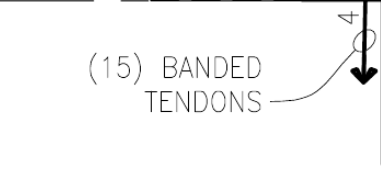

In [5]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-35.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

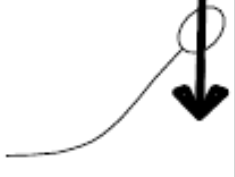

In [6]:
template = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/img_templates/bottom-left.png", cv2.IMREAD_COLOR)
Image.fromarray(template)

0.4595513343811035


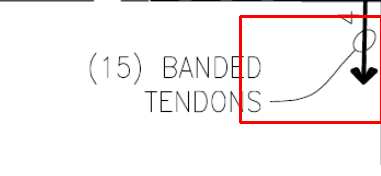

In [7]:
val, bbox = find_template_location(img, template)
x1, y1, x2, y2 = bbox
print(val)
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

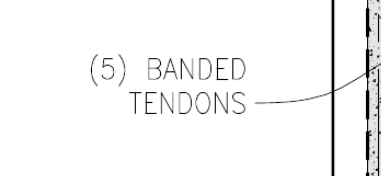

In [8]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-47.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

0.36364278197288513


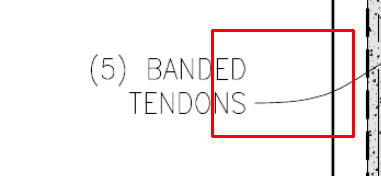

In [9]:
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

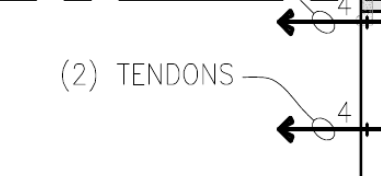

In [10]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-58.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

0.5256578922271729


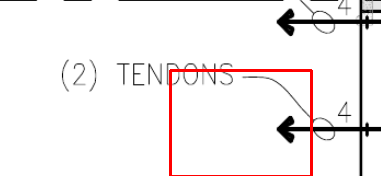

In [11]:
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)